In [23]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [24]:
df = pd.read_excel(r"C:\Users\GW528AU\ironhack\lessons\unit_5\regression\regression_data.xlsx")

In [25]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### Eliminamos columnas que no aportan valor al modelo

#### Columna id

In [26]:
df.drop(['id'],axis=1, inplace=True)

In [27]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### Comprobamos cuantos valores Null hay

In [28]:
df.isnull().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

### Comprobamos que no hay NULLS

In [29]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


### Comprobamos los outliers

##### Bedrooms

<AxesSubplot:>

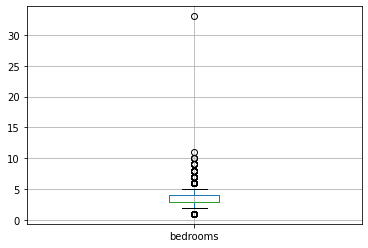

In [30]:
import matplotlib.pyplot as plt
df.boxplot(column=["bedrooms"])

In [31]:
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [32]:
def quitar_outliers(df):
    outliers_index = []
    for columna in ['bedrooms', 'bathrooms']: 
            q1=np.percentile(df[columna], 25)   # percentile 25
            q3=np.percentile(df[columna], 75)   # percentile 75

            iqr=q3-q1  # IQR

            upper=q3 + 1.5*iqr   # upper boundary
            lower=q1 - 1.5*iqr   # lower boundary


            for i, e in enumerate(df[columna]):
                if e > upper or e < lower:
                    outliers_index.append(i)
      
    print(len(set(outliers_index)))
    df.drop(set(outliers_index), inplace = True)
quitar_outliers(df)
    

991


<AxesSubplot:>

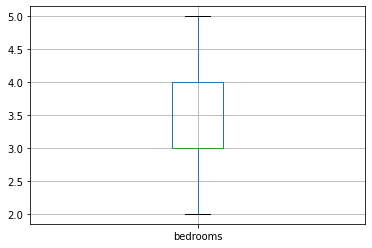

In [33]:
import matplotlib.pyplot as plt
df.boxplot(column=["bedrooms"])


##### Eliminamos outliers de bedrooms

## Cambiamos el formato de la columna date

In [34]:
print(f"Original dtype: {df['date'].dtype}\n")   # object
df['date']=pd.to_datetime(df['date'])   # datetime
print(f"Meantime dtype: {df['date'].dtype}")

Original dtype: datetime64[ns]

Meantime dtype: datetime64[ns]


In [35]:
df['date']=df['date'].apply(lambda x: x.toordinal())   # you can change the type to ordinal.

print(f"New dtype: {df['date'].dtype}")

New dtype: int64


In [36]:
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,735519,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,735576,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,735654,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,735576,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,735647,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,735374,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,735652,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,735407,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,735614,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### Las columnas ya estan estandarizadas

## Modelamos

### Importamos librerías y dividimos el dataframe en Test y Train

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
y = df['price']
X = df.drop(['price'], axis= 1)

In [39]:
y.dropna(inplace=True)
X.dropna(inplace=True)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #dividimos el modelo en train y test

### Linear Regression

In [41]:
df.dtypes

date               int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [42]:
lm = LinearRegression() #modelo
lm.fit(X_train, y_train) #model train
y_predict = lm.predict(X_test) #model prediction

### Validamos los errores

#### R2

In [43]:
train_score=lm.score(X_train, y_train) #R2
test_score=lm.score(X_test, y_test)
model_name = ['Regresión Lineal (lm)']
print ('Model: {}, train R2: {} -- test R2: {}'.format(model_name, train_score, test_score))

Model: ['Regresión Lineal (lm)'], train R2: 0.6956138745683198 -- test R2: 0.6894997324969212


#### MSE

In [44]:
from sklearn.metrics import mean_squared_error as mse
train_mse=mse(lm.predict(X_train), y_train) #MSE
test_mse=mse(y_predict, y_test)
print ('Model: {}, train MSE: {} -- test MSE: {}'.format(model_name, train_mse, test_mse))

Model: ['Regresión Lineal (lm)'], train MSE: 27910777110.753822 -- test MSE: 29193583490.826443


#### RMSE

#### MAE

In [45]:
from sklearn.metrics import mean_absolute_error as mae
train_mae=mae(lm.predict(X_train), y_train) #MAE
test_mae=mae(y_predict, y_test)
print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_name, train_mae, test_mae))

Model: ['Regresión Lineal (lm)'], train MAE: 110420.22729736053 -- test MAE: 111568.4949037596


### Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor as RFR
rfr=RFR()
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

##### R2

In [47]:
train_score=rfr.score(X_train, y_train) #R2
test_score=rfr.score(X_test, y_test)
model_name = ['Regresión Lineal (rfr)']
print ('Model: {}, train R2: {} -- test R2: {}'.format(model_name, train_score, test_score))

Model: ['Regresión Lineal (rfr)'], train R2: 0.9800406014352825 -- test R2: 0.8737203800539504


###### MAE

In [48]:
train_mae=mae(rfr.predict(X_train), y_train) #MAE
test_mae=mae(y_pred_rfr, y_test)
model_name_rfr = ['Random Forest Regressor']
print ('Model: {}, train MAE(RFR): {} -- test MAE(RFR): {}'.format(model_name_rfr, train_mae, test_mae))

Model: ['Random Forest Regressor'], train MAE(RFR): 24072.51732737105 -- test MAE(RFR): 63432.79047719185
